In [1]:
# -*- coding: utf-8 -*-
from optimize import *
from test_model import *
from plotting import *
from read_input import *
import codecs

%matplotlib inline
PYTHONIOENCODING="utf-8"



C:\Users\feita1\Python_Anaconda\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
# export a given mapping to Lisp format
from mapping import *

corpus_weights = {"formal":0.5, "twitter":0.3, "code":0.2}
mapping_name = "mappings/solution_3_even.mst"
scenario = "scenario3"
character_set = "set1"


In [3]:
mapping_to_lisp(get_azerty(), corpus_weights = corpus_weights, scenario=scenario, character_set=character_set, full_mapping=True)
mapping_to_lisp(mapping_name, corpus_weights = corpus_weights, scenario=scenario, character_set=character_set, full_mapping=False)

removed ^ from mapping, not in letters or characters
removed " from mapping, not in letters or characters
removed ¦ from mapping, not in letters or characters
removed ² from mapping, not in letters or characters
removed µ from mapping, not in letters or characters
removed ˚ from mapping, not in letters or characters
removed ' from mapping, not in letters or characters
removed ~ from mapping, not in letters or characters
weighting corpora
weighting corpora
weighting corpora
weighting corpora
weighting corpora
weighting corpora


In [16]:
get_azerty()

{u'!': u'B10',
 u'"': u'E03',
 u'#': u'E03_Alt',
 u'$': u'D12',
 u'%': u'C11_Shift',
 u'&': u'E01',
 u"'": u'E04',
 u'(': u'E05',
 u')': u'E11',
 u'*': u'C12',
 u'+': u'E12_Shift',
 u',': u'B07',
 u'-': u'E06',
 u'.': u'B08_Shift',
 u'/': u'B09_Shift',
 u'0': u'E10_Shift',
 u'1': u'E01_Shift',
 u'2': u'E02_Shift',
 u'3': u'E03_Shift',
 u'4': u'E04_Shift',
 u'5': u'E05_Shift',
 u'6': u'E06_Shift',
 u'7': u'E07_Shift',
 u'8': u'E08_Shift',
 u'9': u'E09_Shift',
 u':': u'B09',
 u';': u'B08',
 u'<': u'B00',
 u'=': u'E12',
 u'>': u'B00_Shift',
 u'?': u'B07_Shift',
 u'@': u'E10_Alt',
 u'[': u'E05_Alt',
 u'\\': u'E08_Alt',
 u']': u'E11_Alt',
 u'^': u'E09_Alt',
 u'^d': u'D11',
 u'_': u'E08',
 u'a': u'D01',
 u'b': u'B05',
 u'c': u'B03',
 u'd': u'C03',
 u'e': u'D03',
 u'f': u'C04',
 u'g': u'C05',
 u'h': u'C06',
 u'i': u'D08',
 u'j': u'C07',
 u'k': u'C08',
 u'l': u'C09',
 u'm': u'C10',
 u'n': u'B06',
 u'o': u'D09',
 u'p': u'D10',
 u'q': u'C01',
 u'r': u'D04',
 u's': u'C02',
 u'space': u'A03',
 u't

1.3461389473011852e-05

In [5]:
p_single

{u'!': 0,
 u'#': 0,
 u'$': 0,
 u'%': 0,
 u'&': 0,
 u'(': 0,
 u')': 0,
 u'*': 0,
 u'+': 0,
 u',': 0,
 u',d': 0,
 u'-': 0,
 u'-d': 0,
 u'.': 0.010467791580637143,
 u'.d': 0,
 u'/': 0,
 u'/d': 0,
 u'0': 0,
 u'1': 0,
 u'2': 0,
 u'3': 0,
 u'4': 0,
 u'5': 0,
 u'6': 0,
 u'7': 0,
 u'8': 0,
 u'9': 0,
 u':': 0,
 u';': 0,
 u'<': 0,
 u'=': 0,
 u'>': 0,
 u'?': 0,
 u'@': 0,
 u'[': 0,
 u'\\': 0,
 u']': 0,
 u'^d': 0,
 u'_': 0,
 u'_d': 0,
 u'a': 0,
 u'b': 0,
 u'c': 0,
 u'd': 0,
 u'e': 0,
 u'f': 0,
 u'g': 0,
 u'h': 0,
 u'i': 0,
 u'j': 0,
 u'k': 0,
 u'l': 0,
 u'm': 0,
 u'n': 0,
 u'o': 0,
 u'p': 0,
 u'q': 0,
 u'r': 0,
 u's': 0,
 u'space': 0,
 u't': 0,
 u'u': 0,
 u'v': 0,
 u'w': 0,
 u'x': 0,
 u'y': 0,
 u'z': 0,
 u'{': 0,
 u'|': 0,
 u'}': 0,
 u'~d': 0,
 u'\xa1': 0,
 u'\xa2': 0,
 u'\xa3': 0,
 u'\xa4': 0,
 u'\xa5': 0,
 u'\xa7': 0,
 u'\xa8d': 0,
 u'\xa9': 0,
 u'\xaa': 0,
 u'\xab': 0,
 u'\xae': 0,
 u'\xb0': 0,
 u'\xb0d': 0,
 u'\xb1': 0,
 u'\xb4d': 0,
 u'\xb7': 0,
 u'\xb8d': 0,
 u'\xba': 0,
 u'\xbb': 0,
 u'\xbc'

In [1]:
from plotting import *
mapping = {1:"a"}
path = "test.csv"
log_mapping(mapping, path)

C:\Users\feita1\Python_Anaconda\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [3]:
from test_model import *
create_dummy_values_performance_ergonomics_probability(randomize=False)

read in: characters, keyslots and letters


0.002072

u'(,, ~)'

{(u'!', u'\xa1'): 1.0,
 (u'%', u'\u2030'): 1.0,
 (u"'", u'"'): 1.0,
 (u'(', u')'): 1.0,
 (u'+', u'\xb1'): 1.0,
 (u',', u';'): 1.0,
 (u'-', u'_'): 1.0,
 (u'.', u':'): 1.0,
 (u'/', u'\\'): 1.0,
 (u'<', u'>'): 1.0,
 (u'<', u'\u2264'): 1.0,
 (u'=', u'\u2260'): 1.0,
 (u'>', u'\u2265'): 1.0,
 (u'?', u'\xbf'): 1.0,
 (u'[', u']'): 1.0,
 (u'`d', u'\xe0'): 1.0,
 (u'{', u'}'): 1.0,
 (u'|', u'\xa6'): 1.0,
 (u'~d', u'~'): 1.0,
 (u'\xab', u'\xbb'): 1.0,
 (u'\xb4d', u'`d'): 1.0,
 (u'\xb4d', u'\xe9'): 1.0,
 (u'\xb8d', u'\xe7'): 1.0,
 (u'\xe0', u'\xc0'): 1.0,
 (u'\xe6', u'\xc6'): 1.0,
 (u'\xe9', u'\xc9'): 1.0,
 (u'\xf8', u'\xd8'): 1.0,
 (u'\u0152', u'\u0153'): 1.0,
 (u'\u02ddd', u'"'): 1.0,
 (u'\u20ac', u'$'): 1.0,
 (u'\u20ac', u'\xa3'): 1.0,
 (u'\u20ac', u'\xa4'): 1.0}

In [4]:
def _is_composed_of(deadkey, character):
    """
        checks if the given character is a composed character and if it is composed with the given deadkey
    """
    if len(character)>1:
        #has multiple characters in it, check if the deadkey is somehwere in there
        for c in character:
            res = _is_composed_of(deadkey,c)
            if res:
                return res
    if unicodedata.decomposition(character) == "":
        return 0
    else:
        deadkey_code = unicodedata.decomposition(deadkey)[-4:]
        character_code = unicodedata.decomposition(character)[-4:]
        return deadkey_code == character_code
_is_composed_of(u"ˆ", u"â")

False

In [11]:
def decompose(c):
    try:
        #print c
        c_d = unicodedata.normalize('NFKD', c)
        #special_char_list = {"^": "0302", "~":"0303", "`":"0300"}
        special_char_list = {}
        for i in range(0,len(c_d)):
            if c_d[i] in special_char_list:
                c_d[i] = special_char_list[c_d[i]]
                
        return c_d
    except:
        return c

In [15]:
unicodedata.normalize('NFKD', u"≠")[1]

u'\u0338'

In [5]:
unicodedata.decomposition(u"≠")

'003D 0338'

In [6]:
unicodedata.decomposition(u"/")

''

In [32]:
unicodedata.decomposition(u"ˊ")

''

In [7]:
u"\0301"

u'\x181'

In [29]:
u"ˊ"

u'\u02ca'

In [30]:
u"´"

u'\xb4'

SyntaxError: invalid syntax (<ipython-input-67-47d5722d1bfb>, line 1)

In [13]:
unicodedata.normalize('NFKD', u"≠")

u'=\u0338'

In [60]:
unicodedata.normalize('NFKD', u"ľ")

u'l\u030c'

In [75]:
c[1]

u'\u0303'

In [65]:
diacritic_unicode = {u"^": u"\u0302", u"ˆ": u"\0302",
                     u"¨": u"\u0308",
                     u"~": u"\u0303", u"˜": u"\0303", 
                     u"˘": u"\u0306",
                     u"ˇ": u"\030c",
                     u"̑": u"\0311",
                     u"ˋ": u"\0300", u"`": u"\0300", 
                     u"ˊ": u"\0301", 
                     u"ˉ": u"\0304", 
                     u"_": u"\0331", u"̲":u"\0331",
                     u"˙": u"\0307",
                     u".": u"\0323",
                     u"°": u"\030a",
                     u"˝": u"\030b",
                     u"˵": u"\030f", u"̏": u"\030f",                     
                     u"¸": u"\0327",
                     u"˛": u"\0328",
                     u",": u"\0326", u"̦": u"\0326", 
                     u"-": u"\0335", u"̵": u"\0335",
                     u"/": u"\0337", u"̷": u"\0337"
                    }



In [58]:
unicode_diacritic = {u"\0302": u"^",
                     u"\0308": u"¨",
                     u"\0303": u"~",
                     u"\0306": u"˘",
                     u"\030c": u"ˇ",
                     u"\0311": u"̑ ",
                     u"\0300": u"ˋ",
                     u"\0301": u"ˊ",
                     u"\0304": u"ˉ",
                     u"\0331": u"_",
                     u"\0307": u"˙",
                     u"\0323": u".",
                     u"\030a": u"°",
                     u"\030b": u"˝",
                     u"\030f": u"˵",              
                     u"\0327": u"¸",
                     u"\0328": u"˛",
                     u"\0326": u",",
                     u"\0335": u"-",
                     u"\0337": u"/"
                    }

In [82]:
a = ["a", "b"]
a.remove("a")

In [85]:
if a: 0 else: 1

SyntaxError: invalid syntax (<ipython-input-85-680cb9139289>, line 1)

In [10]:
from read_input import *
import pandas as pd
def _read_similarity_matrix(path, characters, letters):
    """
        Reads the given matrix into a dictionary of the form (c1,c2)->similarity
        Filters out all characters that are not in the given character list
        Already normalized
    """    
    df = pd.read_excel(path, encoding='utf-8')
    df.index=df.index.str.strip()
    df.columns=df.columns.str.strip()
    index = df.index
    columns = df.columns
    dictionary = {}
    for i in range(0,len(df)): #row index
        for j in range(0, len(df.columns)): #column index
            row = index[i]
            col = columns[j]
            #correct diacritic mark
            row = correct_diacritic(row)
            col = correct_diacritic(col)
            if (row in characters and col in characters) or (row in characters and col in letters):
                if not pd.isnull(df.iloc[i,j]):
                    dictionary[(row,col)] = df.iloc[i,j]
    return dictionary

set_scenario_files("scenario3")
characters = get_characters()
letters = get_letters()
similarity_c_c = _read_similarity_matrix("input/similarity_c_c_binary_m.xlsx", characters, letters)


In [11]:
len(similarity_c_c)

78

In [12]:
similarity_c_c = _read_similarity_matrix("input/similarity_c_c_m.xlsx", characters, letters)
len(similarity_c_c)

85

In [9]:
matrix pd.read_excel("input/similarity_c_c_binary_m.xlsx", encoding='utf-8')

,_,-,‑,–,—,",",;,:,!,¡,...,υ,Υ,φ,Φ,χ,Χ,ψ,Ψ,ω,Ω
_,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-,NaN,NaN,1,1,1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
‑,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
–,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
—,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
",",NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
;,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
!,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
¡,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [115]:
import numpy as np
characters = ["a", "b", "c", "d"]
keyslots = [1,2,3,4]
matrix = {("a", "b"): 1,  ("a", "c"):0,  
         ("b", "a"): 0, ("b", "c"):2, 
         ("c", "a"): 0, ("c", "b"):0, 
         ("c", "d"): 0, ("a", "d"):0,("b", "d"):0, ("d", "a"):0,("d", "b"):0,("d", "c"):0,}

distance_level_0 = {(1,2):1, (1,3):2, (2,3):1, (3,1):2, (2,1):2, (3,2):1, 
                    (1,4):1, (2,4):1, (3,4):1,(4,1):1, (4,2):1, (4,3):1  }


max_sum = 0
for c1 in characters: 
    #for each character determine the maximum association cost for assigning that character to a slot and sum up
    costs_per_slot = []
    for s1 in keyslots:            
        tmp_sum = 0 #sum up the association cost for all other characters 
        for c2 in characters:
            if c1 != c2:
                #add maximum association cost if that character was assigned to a key
                tmp_sum += np.max([matrix[c1,c2]*distance_level_0[s1,s2] for s2 in keyslots if s2 != s1]) 
        costs_per_slot.append(tmp_sum)
    max_sum += np.max(costs_per_slot) #

min_sum = 0
for c1 in characters: 
    #for each character determine the maximum association cost for assigning that character to a slot and sum up
    costs_per_slot = []
    for s1 in keyslots:            
        tmp_sum = 0 #sum up the association cost for all other characters 
        for c2 in characters:
            if c1 != c2:
                #add maximum association cost if that character was assigned to a key
                tmp_sum += np.min([matrix[c1,c2]*distance_level_0[s1,s2] for s2 in keyslots if s2 != s1]) 
        costs_per_slot.append(tmp_sum)
    min_sum += np.min(costs_per_slot) #

n = 3
for (c1,c2), v in distance_level_0.iteritems():
    #if v > 0:
    distance_level_0[(c1,c2)] = (v - (min_sum/float(n))) / (float(max_sum) - float(min_sum))
    #matrix[(c1,c2)] = v / float(max_sum)
           

In [116]:
matrix

{('a', 'b'): 1,
 ('a', 'c'): 0,
 ('a', 'd'): 0,
 ('b', 'a'): 0,
 ('b', 'c'): 2,
 ('b', 'd'): 0,
 ('c', 'a'): 0,
 ('c', 'b'): 0,
 ('c', 'd'): 0,
 ('d', 'a'): 0,
 ('d', 'b'): 0,
 ('d', 'c'): 0}

In [117]:
mapping = {"a": 2, "b":1, "c":3, "d":4}
cost = 0
for c1 in characters:
    s1 = mapping[c1]
    for c2 in characters:
        if c1 != c2:
            s2 = mapping[c2]
            print c1,s1,c2,s2, matrix[c1,c2]*distance_level_0[s1,s2]             
            cost+= matrix[c1,c2]*distance_level_0[s1,s2] 
cost

a 2 b 1 0.333333333333
a 2 c 3 0.0
a 2 d 4 0.0
b 1 a 2 0.0
b 1 c 3 0.666666666667
b 1 d 4 0.0
c 3 a 2 0.0
c 3 b 1 0.0
c 3 d 4 0.0
d 4 a 2 0.0
d 4 b 1 0.0
d 4 c 3 0.0


1.0

In [103]:

d = {("a", 1):1, 
    ("a", 2):2, 
    ("a", 3):2, 
    ("b", 1):2, 
    ("b", 2):2, 
    ("b", 3):2, 
    ("c", 1):0, 
    ("c", 2):1, 
    ("c", 3):0}

max_sum = 0
for c in characters:
    all_slot_values = [v for (_c,_s), v in d.iteritems() if _c==c]
    max_sum += np.max(all_slot_values)


min_sum = 0
for c in characters:
    all_slot_values = [v for (_c,_s), v in d.iteritems() if _c==c]
    min_sum += np.min(all_slot_values)

#then normalize by that
n = len(characters)
for k, v in d.iteritems():
    d[k] = (v - (min_sum/float(n))) / (float(max_sum) - float(min_sum))

In [65]:
max_sum

5

In [68]:
mapping = {"a": 1, "b":2, "c":3
          }
cost = 0
for c in characters:
    s = mapping[c]
    cost+= d[c,s]
cost

0.0

read in: characters, keyslots and letters
read in: similarity values
read in: distance values
weighting corpora
weighting corpora
weighting corpora
Done reading input values.
Getting linear cost
set objective
Adding capitalization constraints
à, À, not in character set
â, Â, not in character set
ç, Ç, not in character set
é, É, not in character set
è, È, not in character set
ë, Ë, not in character set
ê, Ê, not in character set
ï, Ï, not in character set
î, Î, not in character set
ô, Ô, not in character set
ù, Ù, not in character set
û, Û, not in character set
ü, Ü, not in character set
ÿ, Ÿ, not in character set
set constraints
optimizing with linear terms only...
Optimize a model with 1540 rows, 15609 columns and 33098 nonzeros
Coefficient statistics:
  Matrix range    [1e+00, 1e+00]
  Objective range [3e-05, 2e-01]
  Bounds range    [1e+00, 1e+00]
  RHS range       [1e+00, 1e+00]
Found incumbent soln at node 0 objective 0.342551470885
Found heuristic solution: objective 0.342551
Pre

C:\Users\feita1\Python_Anaconda\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


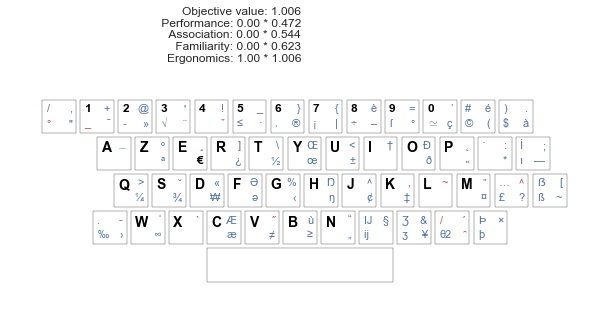

In [1]:
from objectives import * 
from read_input import *
from plotting import *
from reformulation_input import *
from evaluate_reformualtion_solution import * 
from optimize import *

%matplotlib inline

PYTHONIOENCODING="utf-8"

w_p, w_a, w_f, w_e =  [0.0,0.0,0.0,1.0]
corpus_weights = {'formal':0.5, 'twitter':0.3, 'code':0.2}

scenario = "scenarioMAX"
char_set = "setCAPS"
set_scenario_files(scenario, char_set)
#create_reformulation_input(w_p, w_a, w_f, w_e, corpus_weights, scenario+char_set+"_even",
                           #quadratic=1)

mapping = solve_the_keyboard_Problem(w_p, w_a, w_f, w_e, corpus_weights, 
                                     quadratic=0, capitalization_constraints=1, name=scenario+char_set+"_even", minimize=False)
#model = optimize_reformulation("reformulation\\reformulation_scenario3_ass.lp")
#w_p, w_a, w_f, w_e = [0.25,0.25,0.25,0.25]